# 자연어 처리

    Computer Science + Artificial Intelligence + Linguistics => NLP(Natural Language Processing)
    형태소 분석 (Morphological Analysis)
        * 자연언어의 문장을 의미를 가지고 있는 최소 단위(형태소)로 분할하고 형태소들의 품사를 구분
        * 영어는 기본 적으로 띄어쓰기에 의해 구분이 되지만 한국어나 아시아계열 언어는 '조사' 때문에 어려움이 있음
        
        
### KoNLPY 모듈
한글 자연어처리를 위한 형태소 분석 오픈소스 라이브러리
* 설치 가이드 
    각각의 OS별 설치 가이드를 확인 후 설치
    http://konlpy.org/ko/latest/install/
    
    1. JDK 설치
        - 각각의 OS별 환경변수 설정
        - macOS 사용자는 homebrew 사용 권장드립니다!
    2. KoNLPy 설치
        2.1 mac os -> pip install jpype1 실행  
    3. 형태소 추가 설치
        - MeCab 설치 (widnow 지원 X / http://sens.tistory.com/445)

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

#### 설치 모듈
pip install wordcloud
pip install genism    

In [2]:
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
#문장 분석
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [4]:
#명사 분석
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [5]:
#형태소 분석
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [6]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [7]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [8]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [9]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [10]:
from konlpy.tag import Twitter
t = Twitter()

In [11]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [12]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작합', '니다', '재미있어', '요', '~~']

In [13]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작합', 'Verb'),
 ('니다', 'Eomi'),
 ('재미있어', 'Adjective'),
 ('요', 'Eomi'),
 ('~~', 'Punctuation')]

### 워드 클라우드

In [20]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [21]:
text = open('./data/09. alice.txt').read()
alice_mask = np.array(Image.open('./data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [22]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~')
    
%matplotlib inline

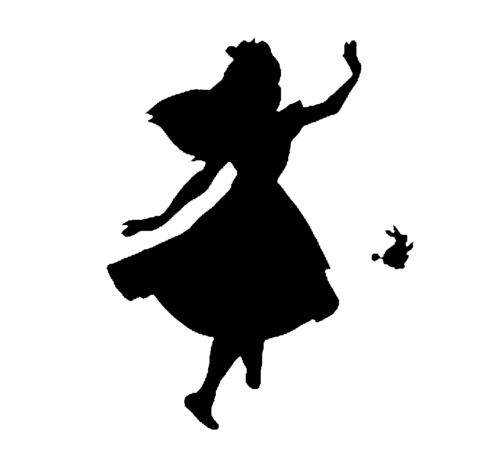

In [23]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
# 워드클라우드 생성
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)
wc = wc.generate(text)
# 문서에서 단어를 카운트/최빈단어
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

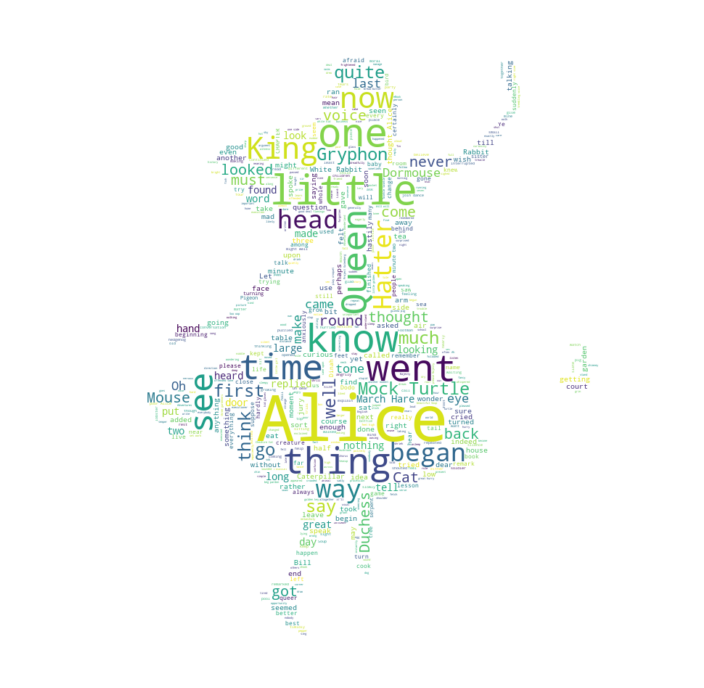

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
text = open('./data/09. a_new_hope.txt').read()
text = text.replace('HAN', 'Han')
text = text.replace("LUKE's", "Luke")

mask = np.array(Image.open('./data/09. stormtrooper_mask.png'))

In [31]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [32]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10, random_state=1).generate(text)
default_colors = wc.to_array()

In [34]:
import random
# 색상을 전체적으로 회색ㅇ,로 채우는 함수
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0,0%%, %d%%)' % random.randint(60,100)

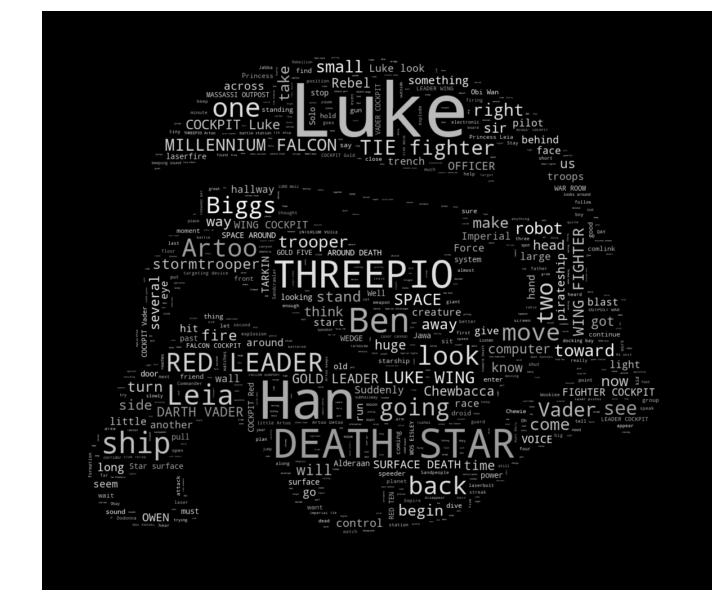

In [35]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
#육아휴직 관련 법안에 대한 분석
import nltk

In [38]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [39]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [40]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '주요',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '조제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '조제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '조',
 '휴직',
 '생',
 '략',
 '제',
 '조',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',


In [41]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

735
258


FreqDist({'가능': 4,
          '가정': 7,
          '각': 1,
          '값': 2,
          '개': 1,
          '개정': 8,
          '개정안': 3,
          '거나': 1,
          '것': 6,
          '것임': 2,
          '경비': 1,
          '경우': 16,
          '고': 1,
          '고용': 14,
          '고용노동부': 3,
          '곧': 1,
          '공': 1,
          '공무원': 10,
          '공포': 1,
          '관련': 2,
          '교육': 4,
          '구조': 1,
          '국가': 2,
          '국가공무원': 2,
          '국회예산정책처': 2,
          '규정': 1,
          '규칙': 1,
          '근거': 1,
          '근로자': 3,
          '급여': 8,
          '기': 1,
          '기간': 1,
          '기업체': 1,
          '기자': 1,
          '김': 1,
          '김을동': 1,
          '김정훈': 1,
          '김학송': 1,
          '까지': 1,
          '나이': 2,
          '날': 1,
          '남녀': 1,
          '내용': 1,
          '년': 7,
          '논의': 1,
          '느': 1,
          '다만': 1,
          '다시': 1,
          '다음': 5,
          '단서': 1,
          '단위': 1,
          '대상': 2,
   

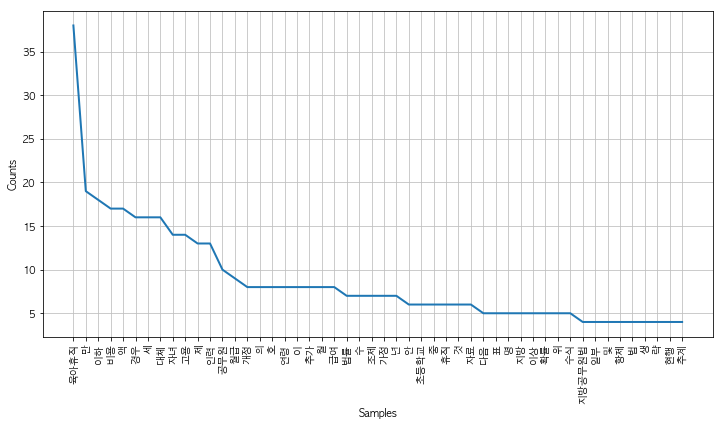

In [42]:
# 많이 등장한 단어 순 - stopwords를 지정하기 어렵다 ㅠㅠ
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [43]:
#case_by_case로 지정
stop_words = ['.','(',')',',',"'",'%','-','X',').','x','의','자','에','안','번','호','을','이','다','만','로','가','를']
ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '주요',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '조제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '조제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '조',
 '휴직',
 '생',
 '략',
 '제',
 '조',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '어',
 '느',
 '하나',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 

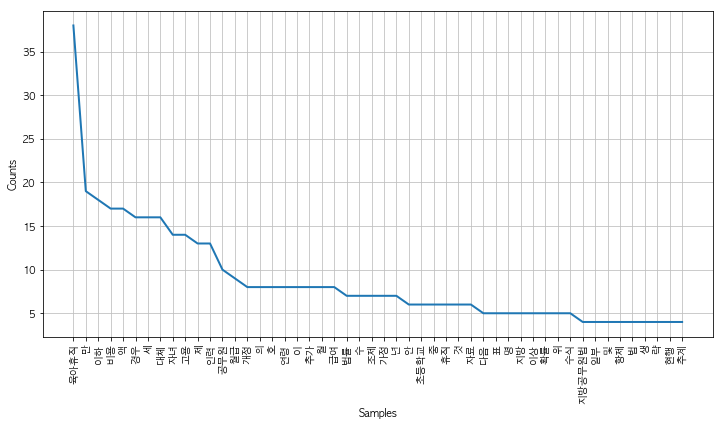

In [44]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [45]:
ko.count('초등학교')

6

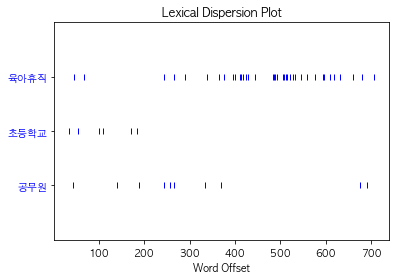

In [46]:
plt.Figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직','초등학교','공무원'])

In [47]:
# 단어들이 연어로 사용되었는지 확인
ko.concordance('초등학교')

Displaying 6 of 6 matches:
백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 주요 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직
 나이 현재 공무원 자녀 양육 육아휴직 수 자녀 나이 만 세 이하 초등학교 저학년 자녀 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 것임
안 지방공무원법 일부 다음 개정 제 조제 항제 호 중 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 의
 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 의 자녀 로 부 칙 이 법 공포 날 시행 신 구조 문대
제 호 의 경우 대통령령 정 사정 직 명 생 략 현행 만 세 이하 초등학교 취 만 세 이하 취학 중인 경우 학 전 자녀 양육 위하 초등학교 
 초등학교 취 만 세 이하 취학 중인 경우 학 전 자녀 양육 위하 초등학교 학년 이하 여 여자 공무원 의 자녀 임신 출산 때 생 략 생 략 


In [48]:
ko.collocations()


초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


In [51]:
data = ko.vocab().most_common(150)
#windows -> c:/Windows/Fonts/malgun.ttf
wordcloud = WordCloud(font_path='/Library/Fonts/AppleCothic.ttf',
                     relative_scaling=0.2,
                     background_color='white',
                     ).generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

OSError: cannot open resource